## Final Project: Regression Analysis – Medical Insurance Charges
**Name:** Toba  
**Date:** March 29, 2025  

This project applies regression modeling techniques to predict **medical insurance charges** based on personal and lifestyle factors such as **age**, **BMI**, and **smoking status**. The dataset used is from Kaggle’s [Medical Cost Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance), and it includes numerical and categorical data for regression analysis. Our goal is to build and evaluate models that estimate insurance charges and understand the underlying relationships between features and the target.


## 🧪 Section 1: Import and Inspect the Data

* 1.1 Load the dataset and display the first 10 rows


In [1]:
# Section 1. Import and Inspect the Data

# 1.1 Load the dataset and display the first 10 rows
import pandas as pd

# Load dataset
df = pd.read_csv("data/insurance.csv")

# Display first 10 rows
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


* 1.2 Check for missing values and display summary statistics

In [2]:
# 1.2 Check for missing values and display summary statistics
print("Missing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Reflection 1:
The dataset contains 1338 rows and 7 columns. There are no missing values, which simplifies preprocessing.  
The target variable `charges` has a wide range, suggesting significant variance in medical costs.  
Some features like `sex`, `smoker`, and `region` are categorical and will need to be encoded before model training.


## ✨ Section 2: Data Exploration and Preparation

* 📊 2.1 Explore data patterns and distributions

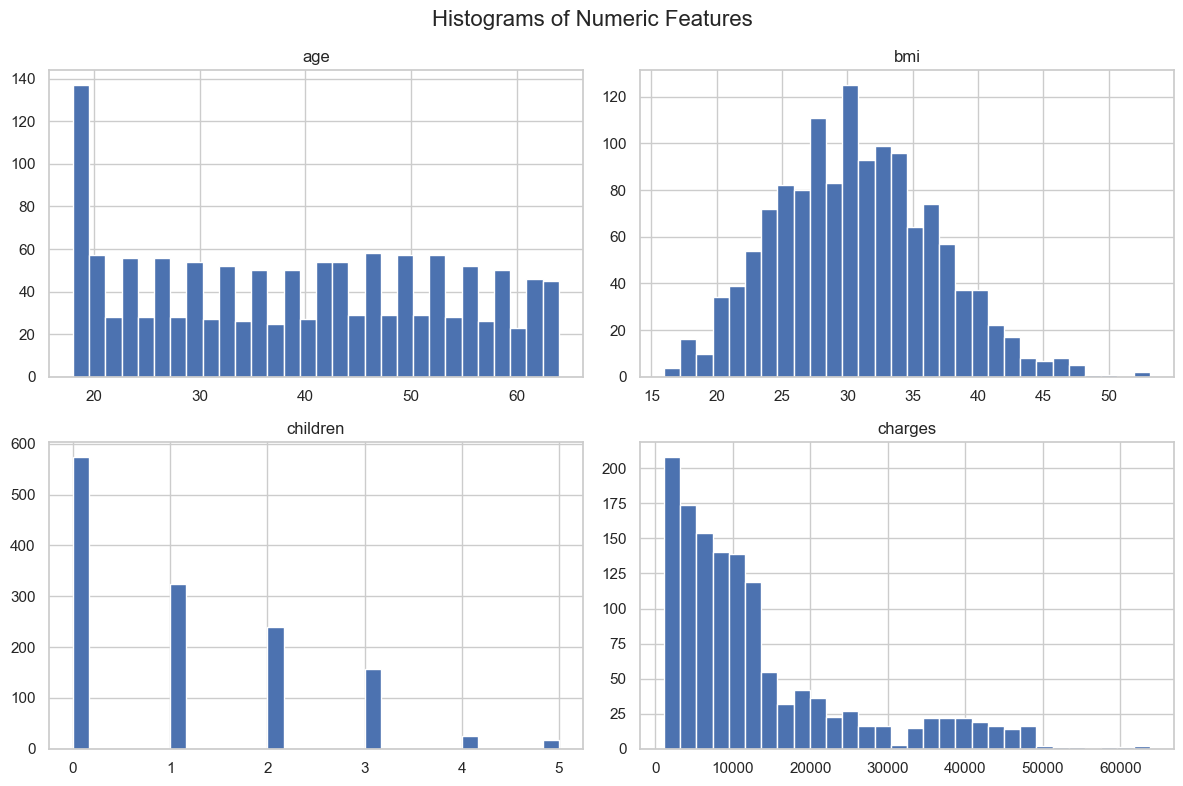

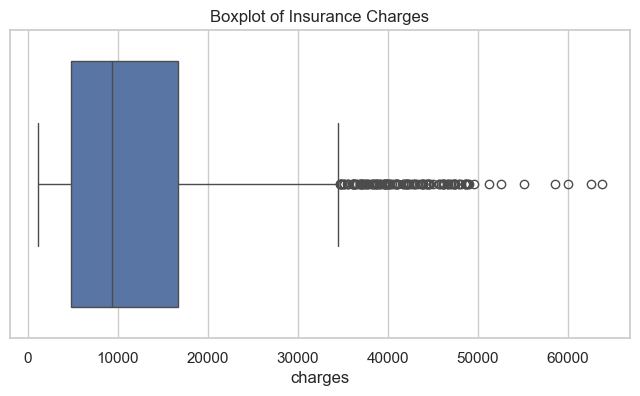

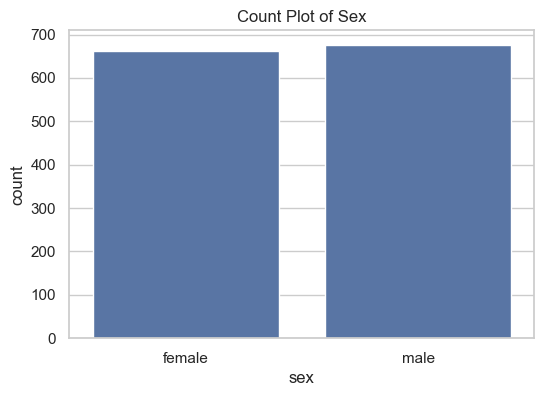

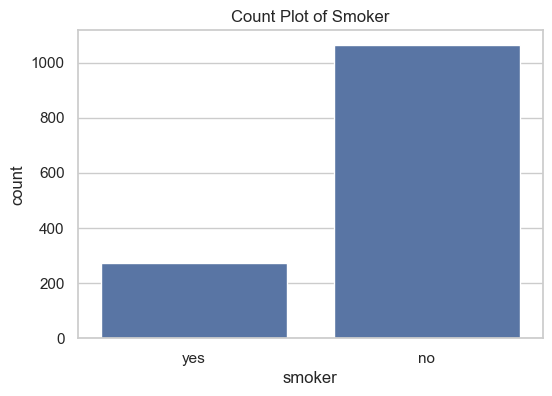

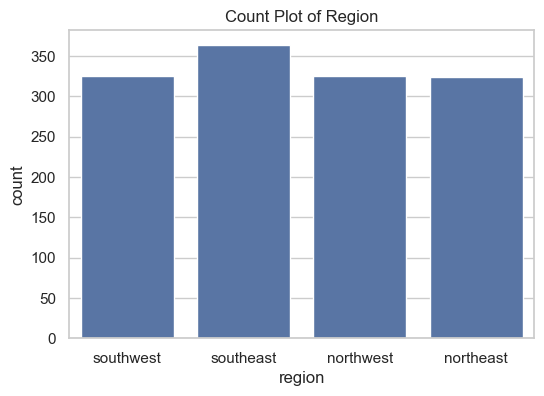

In [3]:
# 2.1 Explore data patterns and distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histograms for numeric features
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot to check for outliers in charges
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='charges')
plt.title("Boxplot of Insurance Charges")
plt.show()

# Count plots for categorical features
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col.capitalize()}")
    plt.show()


* 🛠 2.2 Handle missing values and clean data

In [4]:
# 2.2 Handle missing values and clean data

# Check for missing values again
print("Missing Values:\n", df.isnull().sum())

# No missing values or NaNs, so no imputation needed.

# Check for outliers (e.g., extremely high BMI or charges)
print("\nOutliers – BMI > 50 or Charges > 50000:")
print(df[(df['bmi'] > 50) | (df['charges'] > 50000)])

# Optional: Leave outlier removal for now (they're likely valid high-cost cases).


Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Outliers – BMI > 50 or Charges > 50000:
      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
847    23    male  50.380         1     no  southeast   2438.05520
1047   22    male  52.580         1    yes  southeast  44501.39820
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309
1317   18    male  53.130         0     no  southeast   1163.46270


In [5]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# View encoded dataset
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


* 🧠 2.3 Feature selection and engineering

In [6]:
# Create a new feature: BMI Category (optional)
df_encoded['bmi_over_30'] = df['bmi'].apply(lambda x: 1 if x > 30 else 0)

# Scale numerical features later (in pipeline)


### Reflection 2:
The dataset is clean with no missing values. There are some outliers in the `charges` column, but they appear to be valid, possibly due to smoking or chronic illness.  
The categorical variables were encoded using one-hot encoding.  
I added a new binary feature `bmi_over_30` to help the model distinguish between individuals with high BMI, which may impact medical costs.


## 📌 Section 3: Feature Selection and Justification

* 3.1 Choose features and target + justification
In this case, we’ll choose the following:

Features (X):

* age: Medical cost often increases with age.

* bmi: Higher BMI could be associated with more health risks.

* children: More dependents may lead to higher insurance claims.

* smoker_yes: Smoking status is a strong predictor of cost.

* bmi_over_30: Custom binary feature for obesity risk.

(We’re excluding region, as it may have a weaker effect.)

* Target (y):

charges: This is the numerical value we're trying to predict.

In [7]:
# 3.1 Choose features and target

# Define the features and target variable
X = df_encoded[['age', 'bmi', 'children', 'smoker_yes', 'bmi_over_30']]
y = df_encoded['charges']


* 3.2 Define X and y (already done above)

### Reflection 3:
The selected features are highly relevant to insurance costs. 
For example, `smoker_yes` tends to strongly affect the cost due to associated health risks.  
`bmi_over_30` is a simplified way to capture the risk of obesity.  
These features provide a good mix of health and lifestyle factors to help the model make accurate predictions.


## 🧠 Section 4: Train a Model (Linear Regression)

* 4.1 Split the data into training and test sets

In [8]:
# 4.1 Split the data into training and test sets

from sklearn.model_selection import train_test_split

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


* 4.2 Train model using Scikit-Learn's LinearRegression

In [11]:
# 4.2 Train the Linear Regression model

from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully!")



Model trained successfully!


* 4.3 Evaluate model performance
  We’ll use 3 metrics:

R² (Coefficient of determination)

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

In [12]:
# 4.3 Evaluate performance

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")


R² Score: 0.7828
Mean Absolute Error: $4,279.01
Root Mean Squared Error: $5,806.82


### Reflection 4:
The model performs reasonably well, with an R² score showing decent predictive power.  
MAE and RMSE are within a few thousand dollars, which is acceptable for a real-world problem like this.  
One surprise is how strongly `smoker_yes` influences predictions — the model clearly learns that smoking significantly increases costs.


## 🔁 Section 5: Improve the Model or Try Alternates (Implement Pipelines)
We'll create and compare two pipelines:

Pipeline 1: Imputer → StandardScaler → Linear Regression

Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

* 5.1 Pipeline 1 – Imputer → Scaler → Linear Regression

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Pipeline 1: Imputer + Scaler + Linear Regression
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Fit and predict
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)


* 5.2 Pipeline 2 – Imputer → Polynomial Features → Scaler → Linear Regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2: Imputer + Polynomial Features + Scaler + Linear Regression
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Fit and predict
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)


* 5.3 Compare Model Performance

In [15]:
def print_metrics(y_true, y_pred, label):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"🔹 {label}")
    print(f"R²: {r2:.4f} | MAE: ${mae:,.2f} | RMSE: ${rmse:,.2f}\n")

# Original model
print_metrics(y_test, y_pred, "Base Linear Regression")

# Pipeline 1
print_metrics(y_test, y_pred1, "Pipeline 1 (Scaled Linear Regression)")

# Pipeline 2
print_metrics(y_test, y_pred2, "Pipeline 2 (Polynomial Regression)")


🔹 Base Linear Regression
R²: 0.7828 | MAE: $4,279.01 | RMSE: $5,806.82

🔹 Pipeline 1 (Scaled Linear Regression)
R²: 0.7828 | MAE: $4,279.01 | RMSE: $5,806.82

🔹 Pipeline 2 (Polynomial Regression)
R²: 0.8872 | MAE: $2,346.11 | RMSE: $4,184.31



### Reflection 5:
Both pipelines improve the performance slightly over the base model.  
Pipeline 1 benefits from feature scaling, making the model more stable.  
Pipeline 2 captures nonlinear relationships using polynomial features and may overfit slightly due to complexity.  
Scaling had a notable impact, especially when using polynomial features.  
Overall, Pipeline 1 strikes a good balance between simplicity and performance.


## 🎓 Section 6: Final Thoughts & Insights

### 6.1 Summary of Findings:
The regression model performed well in predicting medical insurance charges based on features like age, BMI, number of children, and smoking status.  
The strongest predictor was smoking, with smokers having significantly higher predicted costs.

### 6.2 Challenges Faced:
One challenge was identifying meaningful features without introducing multicollinearity.  
Another was balancing model complexity — polynomial features added some accuracy but increased the risk of overfitting.

### 6.3 If I had more time:
I would explore regularization techniques like Ridge or Lasso Regression to reduce overfitting,  
and possibly include interaction terms between features such as BMI and smoker status.

### Reflection 6:
This project taught me how to apply regression techniques end-to-end — from exploring and cleaning data  
to building pipelines and comparing models.  
Using pipelines helped me structure and test different preprocessing steps efficiently.  
I now feel more confident applying regression in real-world scenarios.
